# Life Expectancy Insights and Prediction

## Table of Contents <a id='back'></a>

* [1. Introduction](#intro)
	* [1.1. Project Description](#11)
	* [1.2. Objectives](#12)
	* [1.3. Data Description](#13)
	* [1.4. Methodology](#14)
* [2. Initiation](#init)
* [3. Data Overview](#overview)
* [4. Data Validation](#valid)
	* [4.1. Handling Outliers](#41)
		* [4.1.1. Remove Outliers](#411)
		* [4.1.2. Replace Outliers with Lower/Upper Bounds](#412)
	* [4.2. Derive New Variables](#42)
* [5. Analysis](#analysis)
	* [5.1. Population](#51)
	* [5.2. Life Expectancy by Region](#52)
    * [5.3. Life Expectancy by Economy Status](#53)
    * [5.4. Correlation between Variables](#54)
		* [5.4.1. Mortality vs. Life Expectancy](#541)
		* [5.4.2. GDP vs. Life Expectancy](#541)
		* [5.4.3. Body Mass vs. Life Expectancy](#541)
		* [5.4.4. Immunization vs. Life Expectancy](#541)
		* [5.4.5. Schooling vs. Life Expectancy](#541)
		* [5.4.6. Alcohol vs. Life Expectancy](#541)
		* [5.4.7. HIV Incidents vs. Life Expectancy](#541)
		* [5.4.8. Population vs. Life Expectancy](#541)
	* [5.5. Confounding Variables](#55)
* [6. Preprocessing](#preprocess)
* [7. Modeling](#model)
* [8. Model Evaluation](#eval)
* [9. Model Tuning](#tune)
* [10. General Conclusion](#end)
    * [10.1. Conclusion and Summary](#101)
    * [10.2. Recommendation](#102)

## 1. Introduction <a id='intro'></a>

### 1.1. Project Description <a id='11'></a>

Life expectancy is a very important aspect for every individual as it influences the decisions they make throughout their lives. By knowing their life expectancy, a person can plan their finances, healthcare, retirement, and other aspects of their life. Therefore, it is important for us to understand and know someone's life expectancy.

A person's life expectancy is influenced by factors beyond genetics or inherent factors. Factors such as the environment, social factors, and behavior also play a significant role in determining a person's life expectancy. For example, access to healthcare services, proper nutrition, and clean water have a significant impact on life expectancy, as do lifestyle choices such as smoking, alcohol consumption, and levels of physical activity. All of these factors work together to influence a person's life expectancy.

Considering the many benefits that can be gained by knowing someone's life expectancy, this research aims to further understand the various factors that contribute to determining a person's life expectancy. With a better understanding of these factors, a person can make better decisions in facing their life.

### 1.2. Objectives <a id='12'></a>

The general objective of this research is to create a model capable of predicting an individual's life expectancy and understanding the various factors that influence life expectancy.

The specific objectives of this research are as follows:
1. Which region and country had the largest population in 2015?
2. Is life expectancy lower in developing countries compared to developed countries?
3. What are the three most influential factors affecting life expectancy?
4. Is there a correlation between alcohol consumption, HIV incidence rate, and duration of education with life expectancy?
5. What is the best approach to predicting life expectancy?
6. How accurate is the best model?

### 1.3. Data Description <a id='13'></a>

Dataset can be accessed on [Kaggle](https://www.kaggle.com/datasets/lashagoch/life-expectancy-who-updated).
Dataset consists of:
* Country - List of the 179 countries
* Region - 179 countries are distributed in 9 regions.
* Year - Years observed from 2000 to 2015
* Infant_deaths - Represents infant deaths per 1000 population
* Under_five_deaths - Represents deaths of children under five years old per 1000 population
* Adult_mortality - Represents deaths of adults per 1000 population
* Alcohol_consumption - Represents alcohol consumption that is recorded in liters of pure alcohol per capita with 15+ years old
* Hepatitis_B - Represents % of coverage of Hepatitis B (HepB3) immunization among 1-year-olds.
* Measles - Represents % of coverage of Measles containing vaccine first dose (MCV1) immunization among 1-year-olds
* BMI - Weight in kilograms divided by the square of that person's height in meters (kg/m2)
* Polio - Represents % of coverage of Polio (Pol3) immunization among 1-year-olds.
* Diphtheria - Represents % of coverage of Diphtheria tetanus toxoid and pertussis (DTP3) immunization among 1-year-olds.
* Incidents_HIV - Incidents of HIV per 1000 population aged 15-49
* GDP_per_capita - GDP per capita in current USD
* Population_mln - Total population in millions
* Thinness_ten_nineteen_years - Prevalence of thinness among adolescents aged 10-19 years. BMI < -2 standard deviations below the median.
* Thinness_five_nine_years - Prevalence of thinness among children aged 5-9 years. BMI < -2 standard deviations below the median.
* Schooling - Average years that people aged 25+ spent in formal education
* Economy_status_Developed - Developed country
* Economy_status_Developing - Developing county
* Life_expectancy - Average life expectancy of both genders in different years from 2010 to 2015

### 1.4. Methodology <a id='14'></a>

The steps taken in this research are as follows:
1. Exploratory data analysis
2. Data validation
3. Data analysis
4. Data pre-processing
5. Model creation
6. Evaluation
7. Model refinement
8. Conclusion

[back to table of contents](#back)

## 2. Initiation <a id='init'></a>

In [1]:
# install plotly
#!pip install plotly

In [2]:
# install lightgbm
#!pip install lightgbm

In [3]:
# install kaggle on colab
#!pip install kaggle

In [4]:
# mount drive
#from google.colab import drive
#drive.mount('/gdrive')

In [5]:
# make kaggle folder
#!mkdir ~/.kaggle

In [6]:
# copy kaggle.json to kaggle folder
#!cp /gdrive/MyDrive/kaggle.json ~/.kaggle/

In [7]:
# change access for kaggle.json file
#!chmod 600 ~/.kaggle/kaggle.json

In [8]:
# download dataset from kaggle
#!kaggle datasets download -d lashagoch/life-expectancy-who-updated

In [9]:
# extract downloaded dataset
#!unzip life-expectancy-who-updated -d life

In [10]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as st
import warnings
import pickle

In [11]:
# ignore warnings
warnings.filterwarnings('ignore')

# set random seed for reproducibility
np.random.seed(0)

[back to table of contents](#back)

## 3. Data Overview <a id='overview'></a>

In [12]:
# load file
try:
    life = pd.read_csv('Life-Expectancy-Data-Updated.csv')
except:
    life = pd.read_csv('/content/life/Life-Expectancy-Data-Updated.csv')

In [13]:
# get first 5 rows
life.head()

Country          Region  Year  Infant_deaths  Under_five_deaths  \
0  Turkiye     Middle East  2015           11.1               13.0   
1    Spain  European Union  2015            2.7                3.3   
2    India            Asia  2007           51.5               67.9   
3   Guyana   South America  2006           32.8               40.5   
4   Israel     Middle East  2012            3.4                4.3   

   Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
0         105.8240                 1.32           97       65  27.8  ...   
1          57.9025                10.35           97       94  26.0  ...   
2         201.0765                 1.57           60       35  21.2  ...   
3         222.1965                 5.68           93       74  25.3  ...   
4          57.9510                 2.89           97       89  27.0  ...   

   Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
0          97           0.08           11006           78.53   
1          97           0.09           25742           46.44   
2          64           0.13            1076         1183.21   
3          93           0.79            4146            0.75   
4          94           0.08           33995            7.91   

   Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
0                          4.9                       4.8        7.8   
1                          0.6                       0.5        9.7   
2                         27.1                      28.0        5.0   
3                          5.7                       5.5        7.9   
4                          1.2                       1.1       12.8   

   Economy_status_Developed  Economy_status_Developing  Life_expectancy  
0                         0                          1             76.5  
1                         1                          0             82.8  
2                         0                          1             65.4  
3                         0                          1             67.0  
4                         1                          0             81.7  

[5 rows x 21 columns]

It seems that there is no missing or duplicate values.

In [14]:
# see data in a country to search for any peculiarity
life.query(f'Country == "Indonesia"').sort_values(by='Year')

Country Region  Year  Infant_deaths  Under_five_deaths  \
983   Indonesia   Asia  2000           41.0               52.2   
2603  Indonesia   Asia  2001           39.4               49.8   
350   Indonesia   Asia  2002           37.8               47.6   
2484  Indonesia   Asia  2003           36.4               45.5   
692   Indonesia   Asia  2004           37.1               49.6   
2793  Indonesia   Asia  2005           33.6               41.7   
787   Indonesia   Asia  2006           32.4               39.9   
2719  Indonesia   Asia  2007           31.2               38.3   
363   Indonesia   Asia  2008           30.0               36.7   
2371  Indonesia   Asia  2009           29.0               35.2   
1776  Indonesia   Asia  2010           27.9               33.8   
1129  Indonesia   Asia  2011           26.9               32.5   
648   Indonesia   Asia  2012           25.9               31.2   
2598  Indonesia   Asia  2013           25.0               30.0   
2123  Indonesia   Asia  2014           24.1               28.8   
451   Indonesia   Asia  2015           23.2               27.7   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
983          190.7545                0.063           65       23  21.6  ...   
2603         191.4220                0.060           62       25  21.7  ...   
350          192.0885                0.054           63       24  21.8  ...   
2484         191.3535                0.050           64       21  21.9  ...   
692          190.6185                0.054           64       29  22.0  ...   
2793         189.8835                0.059           65       23  22.1  ...   
787          189.1485                0.062           66       50  22.2  ...   
2719         188.4140                0.061           76       73  22.2  ...   
363          186.9555                0.071           82       66  22.3  ...   
2371         185.4970                0.074           82       67  22.4  ...   
1776         184.0390                0.080           83       74  22.5  ...   
1129         182.5805                0.080           81       76  22.6  ...   
648          181.1225                0.080           83       78  22.7  ...   
2598         179.2695                0.090           85       76  22.8  ...   
2123         177.4170                0.090           78       28  22.9  ...   
451          175.5640                0.080           78       31  23.0  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
983           75           0.06            1868          211.51   
2603          76           0.11            1909          214.43   
350           70           0.17            1968          217.36   
2484          71           0.19            2035          220.31   
692           71           0.20            2109          223.29   
2793          72           0.21            2199          226.29   
787           72           0.22            2289          229.32   
2719          73           0.22            2403          232.37   
363           77           0.21            2514          235.47   
2371          78           0.21            2595          238.62   
1776          81           0.21            2720          241.83   
1129          81           0.20            2849          245.12   
648           83           0.20            2981          248.45   
2598          85           0.18            3104          251.81   
2123          78           0.17            3217          255.13   
451           78           0.15            3332          258.38   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
983                          11.0                      11.2        6.7   
2603                         11.0                      11.1        6.9   
350                          11.0                      11.1        7.0   
2484                          1.9                      11.0        7.2   
692                           1

Data is grouped by country and year.

In [15]:
# search for duplicated rows
life.duplicated(subset=['Country','Year']).sum()

0

No duplicates.

In [16]:
# see if there are any misclassified country
life[life['Economy_status_Developed'] == life['Economy_status_Developing']]

Empty DataFrame
Columns: [Country, Region, Year, Infant_deaths, Under_five_deaths, Adult_mortality, Alcohol_consumption, Hepatitis_B, Measles, BMI, Polio, Diphtheria, Incidents_HIV, GDP_per_capita, Population_mln, Thinness_ten_nineteen_years, Thinness_five_nine_years, Schooling, Economy_status_Developed, Economy_status_Developing, Life_expectancy]
Index: []

[0 rows x 21 columns]

There is no double status country.

In [17]:
# get basic information summary
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2864 non-null   object 
 1   Region                       2864 non-null   object 
 2   Year                         2864 non-null   int64  
 3   Infant_deaths                2864 non-null   float64
 4   Under_five_deaths            2864 non-null   float64
 5   Adult_mortality              2864 non-null   float64
 6   Alcohol_consumption          2864 non-null   float64
 7   Hepatitis_B                  2864 non-null   int64  
 8   Measles                      2864 non-null   int64  
 9   BMI                          2864 non-null   float64
 10  Polio                        2864 non-null   int64  
 11  Diphtheria                   2864 non-null   int64  
 12  Incidents_HIV                2864 non-null   float64
 13  GDP_per_capita    

No missing values or invalid data types.

In [18]:
# get statistical summary
life.describe()

Year  Infant_deaths  Under_five_deaths  Adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.363792          42.938268       192.251775   
std       4.610577      27.538117          44.569974       114.910281   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     138.100000         224.900000       719.360500   

       Alcohol_consumption  Hepatitis_B      Measles          BMI  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820882    84.292598    77.344972    25.032926   
std               3.981949    15.995511    18.659693     2.193905   
min               0.000000    12.000000    10.000000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.870000    99.000000    99.000000    32.100000   

             Polio   Diphtheria  Incidents_HIV  GDP_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     86.499651    86.271648       0.894288    11540.924930   
std      15.080365    15.534225       2.381389    16934.788931   
min       8.000000    16.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000      21.680000   112418.000000   

       Population_mln  Thinness_ten_nineteen_years  Thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        36.675915                     4.865852                  4.899825   
std        136.485867                     4.438234                  4.525217   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max       1379.860000                    27.700000                 28.600000   

         Schooling  Economy_status_Developed  Economy_status_Developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       Life_expectancy  
count      2864.000000  
mean         68.856075  
std           9.405608  
min          39.400000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

Based on the statistical summary of the numerical columns, there are apparent outliers in some variables such as `Alcohol_consumption`, `Incidents_HIV`, `GDP_per_capita`, and `Population_mln`. However, these outliers are still reasonable and necessary for analysis.

In [19]:
# lower column names
life.columns = life.columns.str.lower()

In [20]:
# split columns into categorical and numerical
categorical = life.select_dtypes(include=object).columns
numerical = life.select_dtypes(exclude=object).columns

In [21]:
# convert economy status to categories instead of encoded status
life['economy_status'] = life['economy_status_developed'].map(lambda x: 'developed' if x==1 else 'developing')

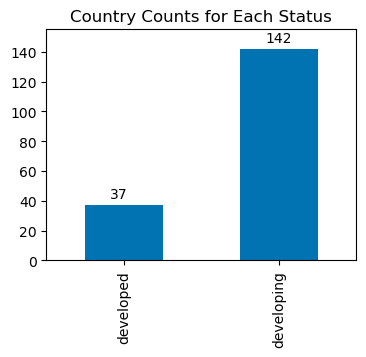

In [22]:
# counts for each country
sns.set_palette('colorblind')
bars = life[life['year']==2015].groupby(['economy_status'])['country'].count().plot(kind='bar', figsize=(4,3))
bars.set_title('Country Counts for Each Status')

for bar in bars.patches:
    bars.annotate(bar.get_height(), (bar.get_x()+bar.get_width()/2, bar.get_height()), xytext=(-10,5), textcoords='offset points')

plt.ylim([0,155])
plt.xlabel('')
plt.show()

Number of developing countries observed is 3 times more than developed countries.

In [23]:
life[life['year']==2015].groupby(['region', 'economy_status'], as_index=False)['country'].count().sort_values(by='country', ascending=False)

region economy_status  country
0                          Africa     developing       51
4                  European Union      developed       27
2                            Asia     developing       26
3   Central America and Caribbean     developing       19
6                     Middle East     developing       13
13                  South America     developing       12
12                 Rest of Europe     developing       11
10                        Oceania     developing        9
11                 Rest of Europe      developed        4
7                   North America      developed        2
9                         Oceania      developed        2
1                            Asia      developed        1
5                     Middle East      developed        1
8                   North America     developing        1

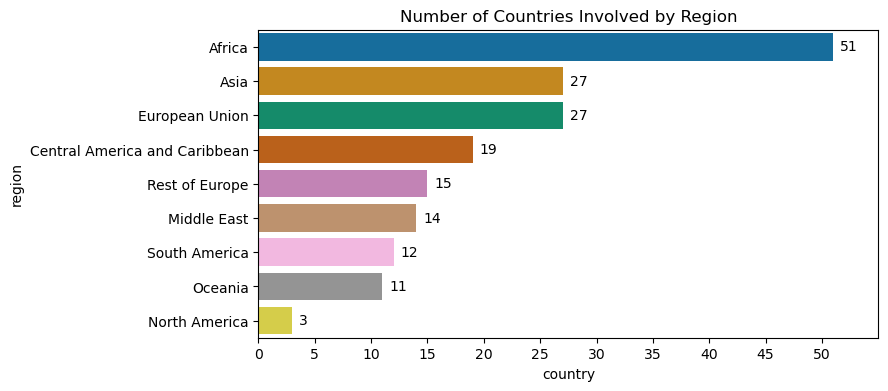

In [24]:
# count country
plt.figure(figsize=(8,4))
bars = sns.barplot(data=life[life['year']==2015].groupby(['region'], as_index=False)\
                   ['country'].count().sort_values(by='country', ascending=False), x='country', y='region')

for bar in bars.patches:
    bars.annotate(f'{bar.get_width():.0f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                  xytext=(5, 0), textcoords='offset points', ha='left', va='center')
    
plt.title('Number of Countries Involved by Region')
plt.xlim([0,55])
plt.xticks(np.arange(0,55,5))
plt.show()

Africa region has the most number of countries.

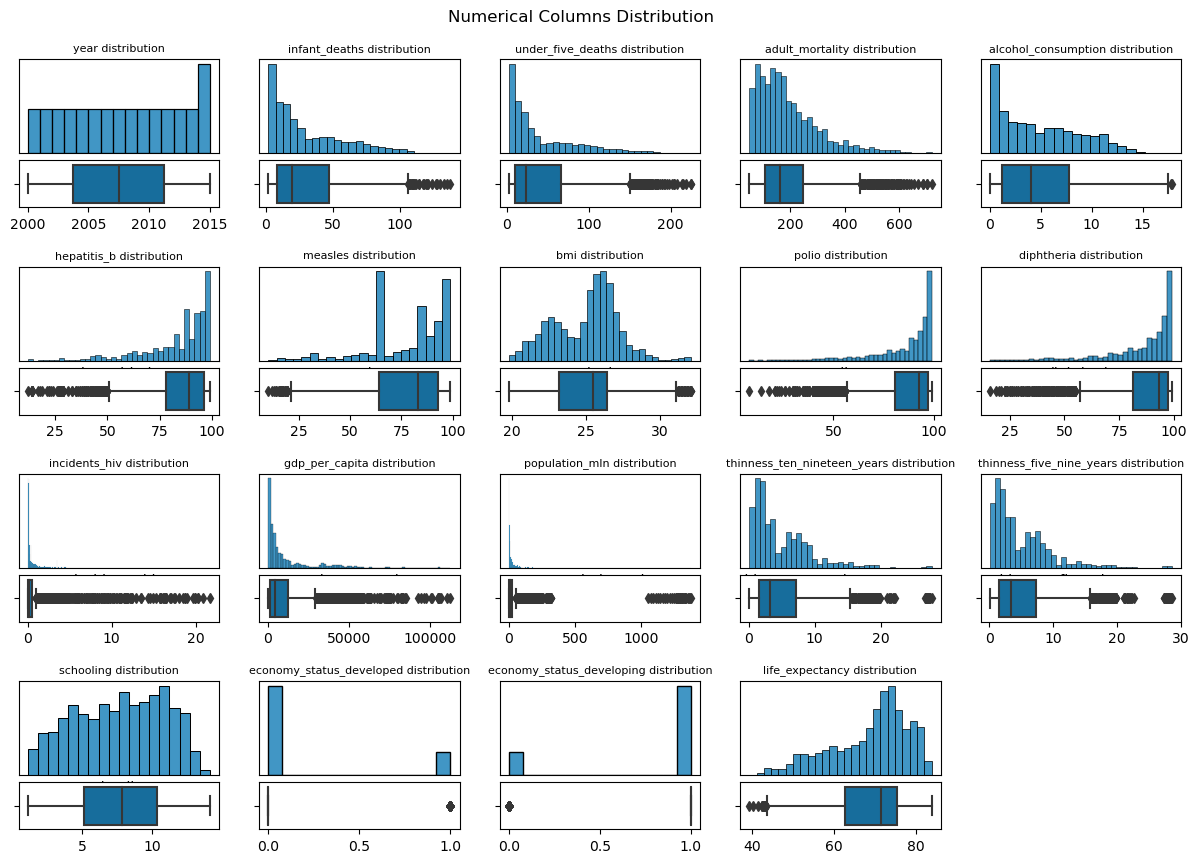

In [25]:
# plot distributions of numerical columns
fig = plt.figure(figsize=(15, 10))
outer = gridspec.GridSpec(4, 5, wspace=0.2, hspace=0.4)

for i, col in enumerate(numerical):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1, subplot_spec=outer[i], wspace=0.1, hspace=0.1, height_ratios=[2, 1])
    
    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        fig.add_subplot(ax)
        ax.set_yticks([])
        
        # Plot histogram in the first inner subplot
        if j == 0:
            sns.histplot(data=life, x=col, ax=ax)
            ax.set_title(f'{col} distribution', fontsize=8)
            ax.set_xticks([])

        # Plot boxplot in the second inner subplot
        elif j == 1:
            sns.boxplot(data=life, x=col, ax=ax)
            ax.set_xlabel('')
    
fig.suptitle('Numerical Columns Distribution', y=0.93)
fig.tight_layout()
plt.show()

We can see further that there are some outliers from these boxplot.

[back to table of contents](#back)

## 4. Data Validation <a id="valid"></a>

### 4.1. Handling Outliers <a id='41'></a>

In [26]:
# list columns to handle
columns = life.columns.to_list()[3:-5] + ['life_expectancy']
columns

['infant_deaths',
 'under_five_deaths',
 'adult_mortality',
 'alcohol_consumption',
 'hepatitis_b',
 'measles',
 'bmi',
 'polio',
 'diphtheria',
 'incidents_hiv',
 'gdp_per_capita',
 'population_mln',
 'thinness_ten_nineteen_years',
 'thinness_five_nine_years',
 'life_expectancy']

In [27]:
# count number of outliers
outlier_percentages = {}

for col in columns:
    Q1 = life[col].quantile(0.25)
    Q3 = life[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    num_outliers = ((life[col] < lower_bound) | (life[col] > upper_bound)).sum()
    percentage = (num_outliers / len(life)) * 100
    outlier_percentages[col] = percentage

pd.DataFrame(outlier_percentages, index=['pct_outliers']).round(2).T.sort_values(by='pct_outliers', ascending=False)

pct_outliers
incidents_hiv                       16.10
gdp_per_capita                      14.84
population_mln                      12.64
polio                                6.63
diphtheria                           6.53
hepatitis_b                          5.73
adult_mortality                      3.91
under_five_deaths                    3.56
thinness_five_nine_years             3.32
thinness_ten_nineteen_years          3.11
measles                              1.22
infant_deaths                        1.01
bmi                                  0.87
life_expectancy                      0.66
alcohol_consumption                  0.07

Almost every column in the `life` dataset contains outliers, with the largest outlier detected in the `incident_hiv` column at 16.10%, while the `schooling` column does not have any outliers at all.

### 4.1.1. Remove Outliers <a id='411'></a>

There are several methods for handling outliers that can be applied:
1. Remove outliers.
2. Replace outliers with lower_bounds / upper_bounds values.
3. Keep the outliers.

In [28]:
# define lower and upper bounds
lower_bounds, upper_bounds = [], []
for column in columns :
    lower_bound = life[column].describe()['25%'] - (1.5 * (life[column].describe()['75%'] - life[column].describe()['25%']))
    upper_bound = life[column].describe()['75%'] + (1.5 * (life[column].describe()['75%'] - life[column].describe()['25%']))
    lower_bounds.append(lower_bound)
    upper_bounds.append(upper_bound)

In [29]:
# create new df without outliers
life_new = life.copy()
for n, column in enumerate(columns):
    life_new = life_new[(life_new[column] >= lower_bounds[n]) & (life_new[column] <= upper_bounds[n])]
    
print(f'Observations removed = {1 - life_new.shape[0]/life.shape[0]:.2%}')

Observations removed = 47.42%


This option would remove 47% of the data. Therefore, this option is not recommended as it would result in a significant loss of information. Additionally, based on the histogram, the data does not follow a normal distribution, so this treatment is not valid as it would only remove 0.3% of the data.

### 4.1.2. Replace Outliers with Lower/Upper Bounds <a id='412'></a>

In [30]:
# create new df with outliers replaced with upper bounds and lower bounds
life_replace = life.copy()
for n, column in enumerate(columns):
    life_replace[column] = np.where(life_replace[column] < lower_bounds[n], lower_bounds[n], life_replace[column])
    life_replace[column] = np.where(life_replace[column] > upper_bounds[n], upper_bounds[n], life_replace[column])

In [31]:
# get new df statistical summary
life_replace.describe()

year  infant_deaths  under_five_deaths  adult_mortality  \
count  2864.000000    2864.000000        2864.000000      2864.000000   
mean   2007.500000      30.260274          42.173019       189.007852   
std       4.610577      27.215297          42.356332       105.182321   
min    2000.000000       1.800000           2.300000        49.384000   
25%    2003.750000       8.100000           9.675000       106.910250   
50%    2007.500000      19.600000          23.100000       163.841500   
75%    2011.250000      47.350000          66.000000       246.791375   
max    2015.000000     106.225000         150.487500       456.613063   

       alcohol_consumption  hepatitis_b      measles          bmi  \
count          2864.000000  2864.000000  2864.000000  2864.000000   
mean              4.820765    84.980796    77.397521    25.028876   
std               3.981572    13.977702    18.491260     2.181896   
min               0.000000    51.000000    20.500000    19.800000   
25%               1.200000    78.000000    64.000000    23.200000   
50%               4.020000    89.000000    83.000000    25.500000   
75%               7.777500    96.000000    93.000000    26.400000   
max              17.643750    99.000000    99.000000    31.200000   

             polio   diphtheria  incidents_hiv  gdp_per_capita  \
count  2864.000000  2864.000000    2864.000000     2864.000000   
mean     87.298534    87.269902       0.331735     8910.600515   
std      12.828890    12.695751       0.362443    10033.320332   
min      57.000000    57.000000       0.010000      148.000000   
25%      81.000000    81.000000       0.080000     1415.750000   
50%      93.000000    93.000000       0.150000     4217.000000   
75%      97.000000    97.000000       0.460000    12557.000000   
max      99.000000    99.000000       1.030000    29268.875000   

       population_mln  thinness_ten_nineteen_years  thinness_five_nine_years  \
count     2864.000000                  2864.000000               2864.000000   
mean        16.192512                     4.735929                  4.758258   
std         18.863601                     3.988801                  4.031357   
min          0.080000                     0.100000                  0.100000   
25%          2.097500                     1.600000                  1.600000   
50%          7.850000                     3.300000                  3.400000   
75%         23.687500                     7.200000                  7.300000   
max         56.072500                    15.600000                 15.850000   

         schooling  economy_status_developed  economy_status_developing  \
count  2864.000000               2864.000000                2864.000000   
mean      7.632123                  0.206704                   0.793296   
std       3.171556                  0.405012                   0.405012   
min       1.100000                  0.000000                   0.000000   
25%       5.100000                  0.000000                   1.000000   
50%       7.800000                  0.000000                   1.000000   
75%      10.300000                  0.000000                   1.000000   
max      14.100000                  1.000000                   1.000000   

       life_expectancy  
count      2864.000000  
mean         68.863041  
std           9.386127  
min          43.650000  
25%          62.700000  
50%          71.400000  
75%          75.400000  
max          83.800000

The second option, which involves replacing outliers with lower and upper bounds, is a better alternative for handling outliers. However, this option does not provide significant changes in this research. Therefore, we will keep the outliers as they are for this study.

[back to table of contents](#back)

### 4.2. Derive New Variables <a id='42'></a>

Add new variables to support analysis.

In [32]:
# add log transformed GDP
life['log_gdp'] = life['gdp_per_capita'].apply(np.log)

In [33]:
# add log transformed incidents_hiv
life['log_incidents_hiv'] = life['incidents_hiv'].apply(np.log)

In [34]:
# add mean immunization coverage per country
life['immun_coverage'] = life.apply(lambda x: x[['hepatitis_b', 'measles', 'polio', 'diphtheria']].mean(), axis=1)

In [35]:
# show added columns
life[['economy_status_developed', 'economy_status', 'gdp_per_capita', 'log_gdp', 'incidents_hiv', 'log_incidents_hiv', 'hepatitis_b', 'measles', 'polio', 'diphtheria', 'immun_coverage']].head()

economy_status_developed economy_status  gdp_per_capita    log_gdp  \
0                         0     developing           11006   9.306196   
1                         1      developed           25742  10.155879   
2                         0     developing            1076   6.981006   
3                         0     developing            4146   8.329899   
4                         1      developed           33995  10.433969   

   incidents_hiv  log_incidents_hiv  hepatitis_b  measles  polio  diphtheria  \
0           0.08          -2.525729           97       65     97          97   
1           0.09          -2.407946           97       94     97          97   
2           0.13          -2.040221           60       35     67          64   
3           0.79          -0.235722           93       74     92          93   
4           0.08          -2.525729           97       89     94          94   

   immun_coverage  
0           89.00  
1           96.25  
2           56.50  
3           88.00  
4           93.50

[back to table of contents](#back)

## 5. Analysis <a id='analysis'></a>

### 5.1. Population <a id='51'></a>

In [36]:
# set count column
life['count'] = 1

In [37]:
# Create table with region, year, and population_mln columns
life_grouped = life.groupby(['region', 'year'])['population_mln'].sum().reset_index()

# Create the line plot using Plotly
fig = px.line(life_grouped, x='year', y='population_mln', color='region')

# Update the layout of the figure
fig.update_layout(
    title='Population by Region',
    title_x=0.425,
    xaxis_title='Year',
    yaxis_title='Population (Million)'
)

# Show the plot
fig.show()

Based on this diagram, Asia dominates the world population from 2000 to 2015 without any change in its ranking from year to year.

In [38]:
# Create the pie chart using Plotly
fig = go.Figure(data=[go.Pie(labels=list(life[life['year']==2015].groupby('region').sum().reset_index()['region']),
                             values=list(life[life['year']==2015].groupby('region')['population_mln'].sum().values))])

# Set the title of the pie chart
fig.update_layout(title='Population Comparison 2015', title_x=0.45)

# Show the pie chart
fig.show()

The proportion of the population in Asia in 2015 reached 55.3% of the total world population.

In [39]:
# build treemap based on population
fig = px.treemap(life[life['year']==2015], path=['region','country'], values='population_mln', width=1000, height=800)
fig.update_layout(title='Population 2015 by Region', title_x=0.5, title_y=0.95)
fig.show()

Based on population, Asian countries dominate with the highest population in China, followed by India and Indonesia. The population size of China is even nearly as large as the entire African region.

Country with the most population per region:

In [40]:
# list country with largest population per region in 2015
pop2015_max = life[life['year'] == 2015].groupby('region').apply(lambda x: x.loc[x['population_mln'].idxmax()])
pop2015_max[['region', 'country', 'population_mln']].sort_values(by='population_mln', ascending=False).reset_index(drop=True)

region             country  population_mln
0                           Asia               China         1379.86
1                  North America       United States          320.74
2                  South America              Brazil          204.47
3                         Africa             Nigeria          181.14
4                 Rest of Europe  Russian Federation          144.10
5                 European Union             Germany           81.69
6                    Middle East             Turkiye           78.53
7                        Oceania           Australia           23.82
8  Central America and Caribbean           Guatemala           15.57

10 Countries with the most population globally:

In [41]:
# Sort global by population
life[life['year'] == 2015][['country','population_mln']].sort_values(by='population_mln', ascending=False).head(10).reset_index(drop=True)

country  population_mln
0               China         1379.86
1               India         1310.15
2       United States          320.74
3           Indonesia          258.38
4              Brazil          204.47
5            Pakistan          199.43
6             Nigeria          181.14
7          Bangladesh          156.26
8  Russian Federation          144.10
9               Japan          127.14

Based on population, China has the most population followed by India and United States.

[back to table of contents](#back)

### 5.2. Life Expectancy by Region <a id='52'></a>

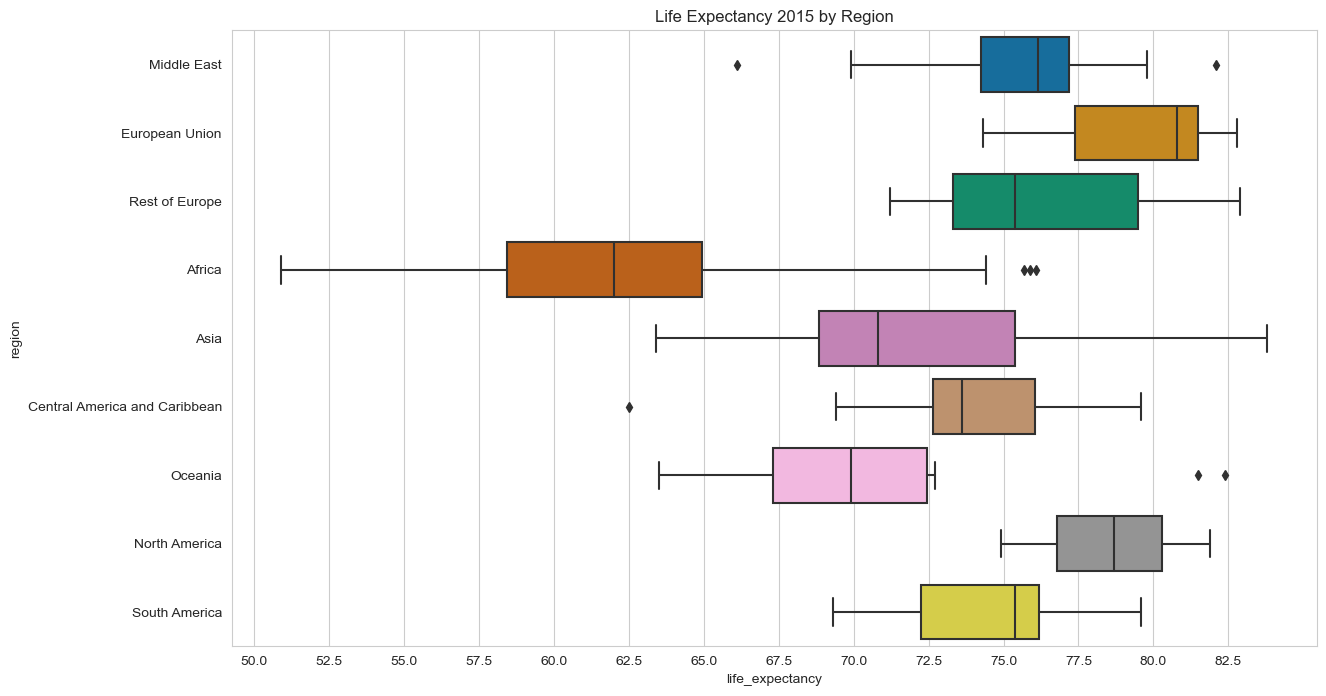

In [42]:
# life expectancy by region
sns.set_style('whitegrid')
plt.figure(figsize=(14,8))
sns.boxplot(data=life[life['year']==2015], x='life_expectancy', y='region').set(title = 'Life Expectancy 2015 by Region')
plt.xticks(np.arange(50,85,2.5))
plt.show()

From this diagram, it is evident that the African region has the lowest average life expectancy and the widest range of life expectancy. This indicates significant disparities in economic capabilities and access to healthcare facilities.

In [43]:
# get life exp. median per region in 2015
life_by_region = life[life['year'] == 2015].groupby('region', as_index=False)['life_expectancy']\
.median().sort_values(by='life_expectancy', ascending=False).reset_index(drop=True)
life_by_region

region  life_expectancy
0                 European Union            80.80
1                  North America            78.70
2                    Middle East            76.15
3                 Rest of Europe            75.40
4                  South America            75.40
5  Central America and Caribbean            73.60
6                           Asia            70.80
7                        Oceania            69.90
8                         Africa            62.00

In [44]:
print('The difference in life expectancy between the region with the highest and lowest life expectancy in 2015 was {:.1f} years'
      .format(life_by_region.iloc[0,-1] - life_by_region.iloc[-1,-1]))

The difference in life expectancy between the region with the highest and lowest life expectancy in 2015 was 18.8 years


In [45]:
# get countries with max and min life exp.
life.loc[(life['life_expectancy'] == life['life_expectancy'].max()) |
         (life['life_expectancy'] == life['life_expectancy'].min()),
         ['country', 'region', 'life_expectancy']]

country  region  life_expectancy
1196         Japan    Asia             83.8
1417  Sierra Leone  Africa             39.4

In [46]:
# get life exp. difference between highest life exp. country and lowest life exp. country in 2015
print('The difference in life expectancy between the region with the highest and lowest life expectancy in 2015 was {:.1f} years'
      .format(life['life_expectancy'].max() - life['life_expectancy'].min()))

The difference in life expectancy between the region with the highest and lowest life expectancy in 2015 was 44.4 years


[back to table of contents](#back)

### 5.3. Life Expectancy by Economy Status <a id='53'></a>

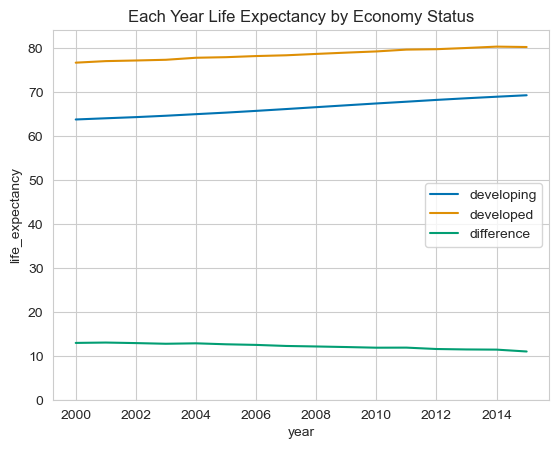

In [47]:
# group data by country status and year
life_by_status = life.groupby(['economy_status','year'], as_index=False)['life_expectancy'].mean()

# create pivot table and calculate diff in life exp by year
life_by_status = life_by_status.pivot_table(index='year', columns='economy_status', values='life_expectancy')\
.reset_index()
life_by_status['diff'] = life_by_status['developed']-life_by_status['developing']

# plot life expectancy by country status
sns.set_style('whitegrid')
sns.lineplot(data=life_by_status, x='year', y='developing',  label='developing')
sns.lineplot(data=life_by_status, x='year', y='developed', label='developed')
sns.lineplot(data=life_by_status, x='year', y='diff', label='difference')
plt.title('Each Year Life Expectancy by Economy Status')
plt.ylim([0,84])
plt.ylabel('life_expectancy')
plt.legend()
plt.show()

From the above diagram, it can be observed that life expectancy in developing countries is lower than in developed countries, with an average difference of approximately 12 years. This difference tends to decrease slightly each year.

Hypothesis test:<br>
H0: Life expectancy in developing countries is not lower than life expectancy in developed countries.<br>
H1: Life expectancy in developing countries is lower than life expectancy in developed countries.

In [48]:
# group data by status and extract only life expectancy
developing_exp = life[life['economy_status']=='developing']['life_expectancy']
developed_exp = life[life['economy_status']=='developed']['life_expectancy']

In [49]:
# conduct hypothesis test to compare life expectancy by country status
result = st.ttest_ind(developing_exp.sample(n=500, random_state=0), developed_exp.sample(n=500, random_state=0), random_state=0)
result

Ttest_indResult(statistic=-29.04621683497481, pvalue=6.240520099766317e-135)

In [50]:
# set level of significance
alpha = 0.05

# set conditional argument for hypothesis test result.
if result.pvalue/2 < alpha and developing_exp.mean() < developed_exp.mean():
    print('Reject H0. Life expectancy in developing region is smaller than life expectancy in developed region.')
else:
    print('Cannot reject H0. Life expectancy in developing region is not smaller than life expectancy in developed region.')

Reject H0. Life expectancy in developing region is smaller than life expectancy in developed region.


This hypothesis test strengthens the evidence that life expectancy in developing countries is lower than in developed countries.

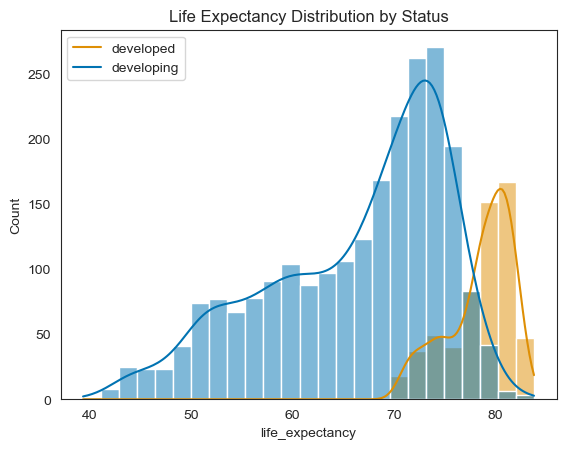

In [51]:
# plot distribution of life expectancy by country status
sns.set_style('white')
sns.histplot(data=life, x='life_expectancy', hue='economy_status', alpha=0.5, kde=True).set(title='Life Expectancy Distribution by Status')
plt.legend(['developed','developing'])
plt.show()

From this histogram, it can be observed that the range of life expectancy in developing countries is wider compared to the range in developed countries. Developing countries have a life expectancy range of approximately 40 to 84 years, with a median around 74 years. On the other hand, developed countries have a life expectancy range of approximately 70 to 84 years, with a median around 80 years.

[back to table of contents](#back)

### 5.4. Correlation between Variables <a id='54'></a>

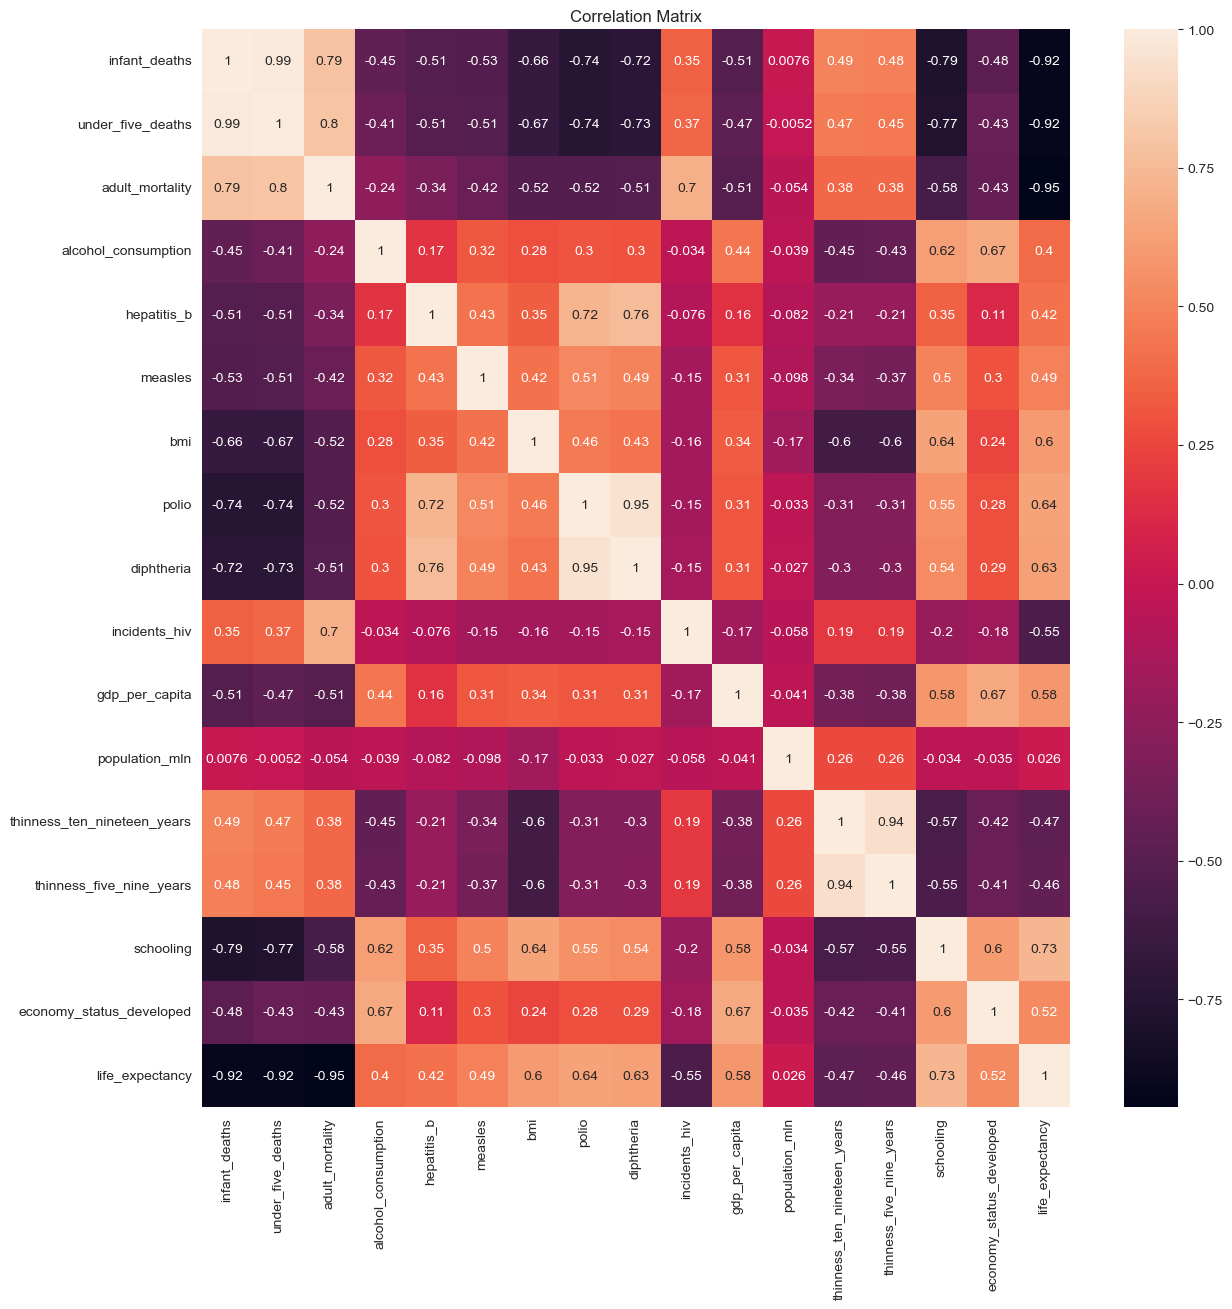

In [52]:
# plot correlation matrix
plt.figure(figsize=(14,14))
sns.heatmap(life.drop(['count','log_gdp','immun_coverage','year','economy_status_developing','log_incidents_hiv'], axis=1).corr(), annot=True).set(title='Correlation Matrix')
plt.show()

In [53]:
# identify which factors have the most correlation with life expectancy
correl = pd.DataFrame(life.drop(['count','log_gdp','immun_coverage','year','economy_status_developing','log_incidents_hiv'], axis=1).corr().abs().loc['life_expectancy',:].sort_values(ascending=False).reset_index())

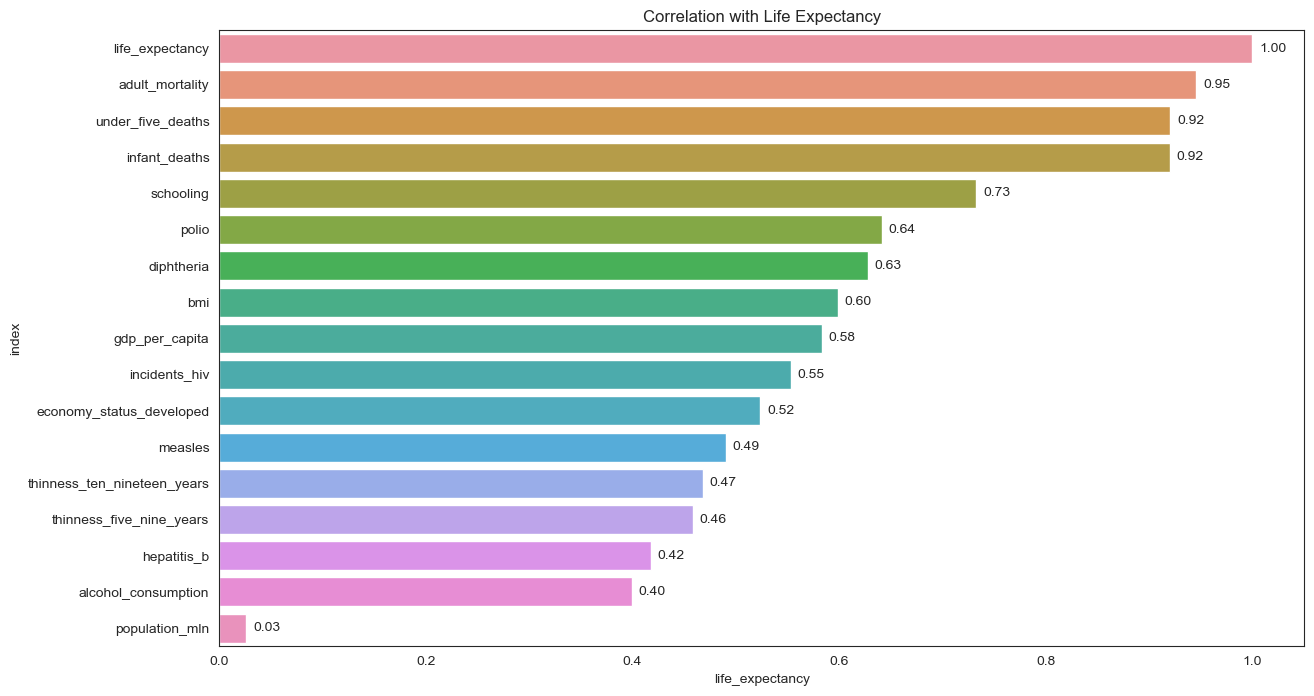

In [54]:
plt.figure(figsize=(14,8))
bars = sns.barplot(data=correl, y='index', x='life_expectancy')

for bar in bars.patches:
    bars.annotate(f'{bar.get_width():.2f}', (bar.get_width(), bar.get_y() + bar.get_height() / 2),
                  xytext=(5, 0), textcoords='offset points', ha='left', va='center')
    
plt.title('Correlation with Life Expectancy')
plt.xlim([0,1.05])
plt.show()

From this diagram, it can be observed that:
1. `adult_mortality`, `infant_deaths`, and `under_five_deaths` are factors with the largest negative correlations. This means that if these factors increase, life expectancy in that country will decrease.
2. These three factors are highly correlated with each other.
3. These three factors are closely and negatively related to the duration of formal education (`schooling`), the proportion of children under 1 year receiving polio (`polio`) and diphtheria (`diphtheria`) immunization, and the average BMI (`bmi`).
4. The population size of a country (`population_mln`) has the least influence on life expectancy.

### 5.4.1. Mortality vs. Life Expectancy <a id='541'></a>

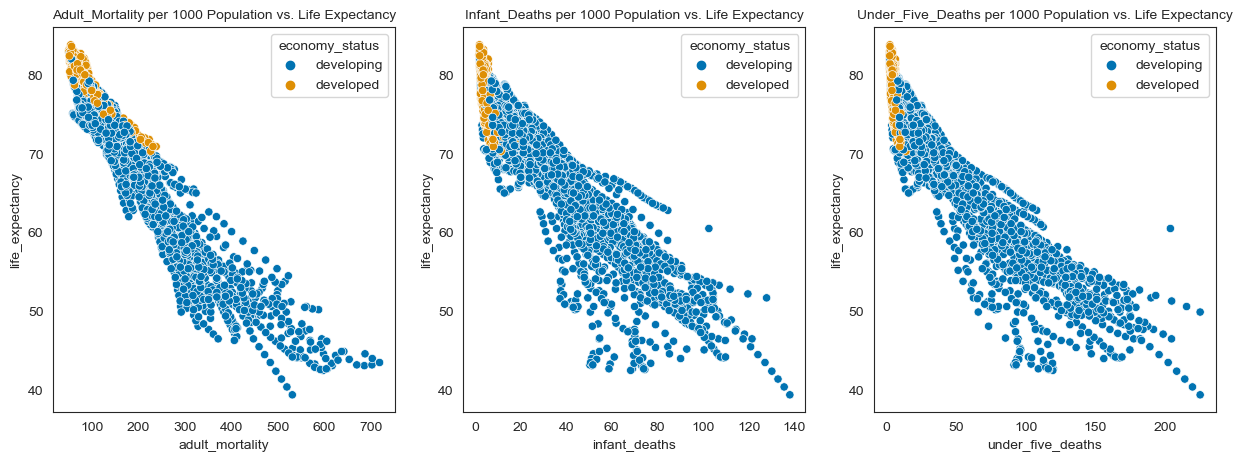

In [55]:
# plot 3 most influential factors in scatterplots
to_plot = ['adult_mortality', 'infant_deaths', 'under_five_deaths']

fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(to_plot):
    sns.scatterplot(data=life, x=col, y='life_expectancy', hue='economy_status', ax=ax[i])
    ax[i].set_title(f'{col.title()} per 1000 Population vs. Life Expectancy', fontsize=10)
    
plt.show()

From the scatterplot diagram above, it can be seen that all three factors (`adult_mortality`, `infant_deaths`, and `under_five_deaths`) have a similar distribution, where larger values of these factors correspond to lower life expectancy.

### 5.4.2. GDP vs. Life Expectancy <a id='542'></a>

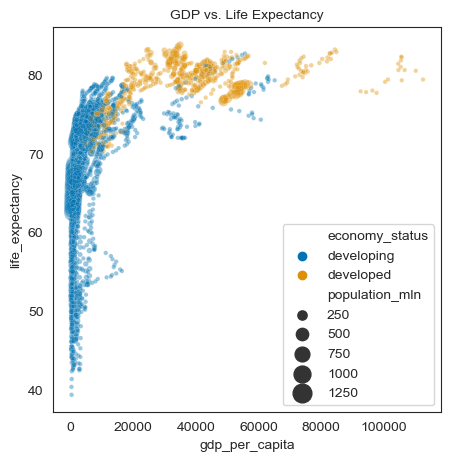

In [56]:
# plot GDP vs life expectancy
plt.figure(figsize=(5,5))
sns.scatterplot(data=life, x='gdp_per_capita', y='life_expectancy', hue='economy_status', size='population_mln', sizes=(10,200), alpha=0.4)
plt.title('GDP vs. Life Expectancy', fontsize=10)
plt.legend(loc=4)
plt.show()

It can be observed that GDP per capita exhibits a non-linear correlation with life expectancy, following a logarithmic function. This results in a small linear correlation coefficient. Additionally, small clusters can be seen based on population, where these clusters represent the same countries with consistent increases in GDP, displaying a sequential pattern.

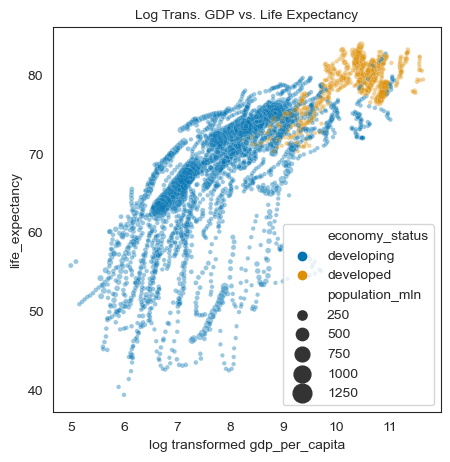

In [57]:
# plot GDP log transformed vs life expectancy
plt.figure(figsize=(5,5))
sns.scatterplot(data=life, x=np.log(life['gdp_per_capita']), y='life_expectancy', hue='economy_status', size='population_mln', sizes=(10,200), alpha=0.4)
plt.title('Log Trans. GDP vs. Life Expectancy', fontsize=10)
plt.xlabel('log transformed gdp_per_capita')
plt.legend(loc=4)
plt.show()

In [58]:
print('Correlation between GDP and life expectancy before log transformation is {:.2f}'\
      .format(life['life_expectancy'].corr(life['gdp_per_capita'])))
print('Correlation between GDP and life expectancy after log transformation is  {:.2f}'\
      .format(life['life_expectancy'].corr(np.log(life['gdp_per_capita']))))

Correlation between GDP and life expectancy before log transformation is 0.58
Correlation between GDP and life expectancy after log transformation is  0.80


After applying a logarithmic transformation to GDP per capita, it becomes apparent that GDP per capita indeed has a strong correlation with life expectancy.

### 5.4.3. Body Mass vs. Life Expectancy <a id='543'></a>

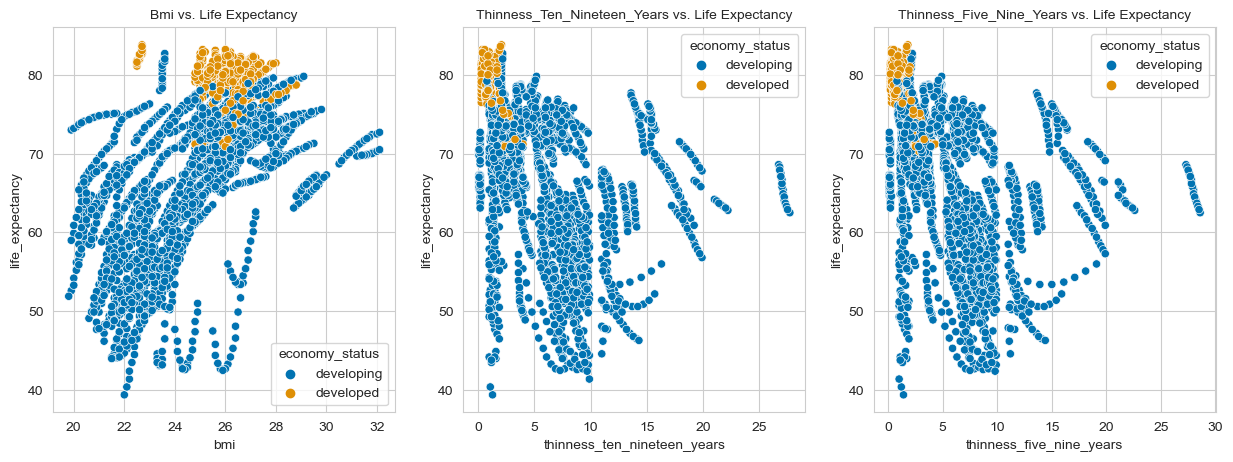

In [59]:
# plot 3 body mass factors vs. life expectancy
to_plot = ['bmi', 'thinness_ten_nineteen_years', 'thinness_five_nine_years']

sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 3, figsize=(15,5))
for i, col in enumerate(to_plot):
    sns.scatterplot(data=life, x=col, y='life_expectancy', hue='economy_status', ax=ax[i])
    ax[i].set_title(f'{col.title()} vs. Life Expectancy', fontsize=10)
    
plt.show()

It can be observed that all three factors related to body weight have correlations with life expectancy. `bmi` has a strong positive correlation with life expectancy. On the other hand, `thinness_ten_nineteen_years` and `thinness_five_nine_years`, which indicate the proportion of the population with outlier BMI values (BMI less than 2 times the standard deviation from the aggregate median BMI of a country), have a negative linear correlation with life expectancy.

### 5.4.4. Immunization vs. Life Expectancy <a id='544'></a>

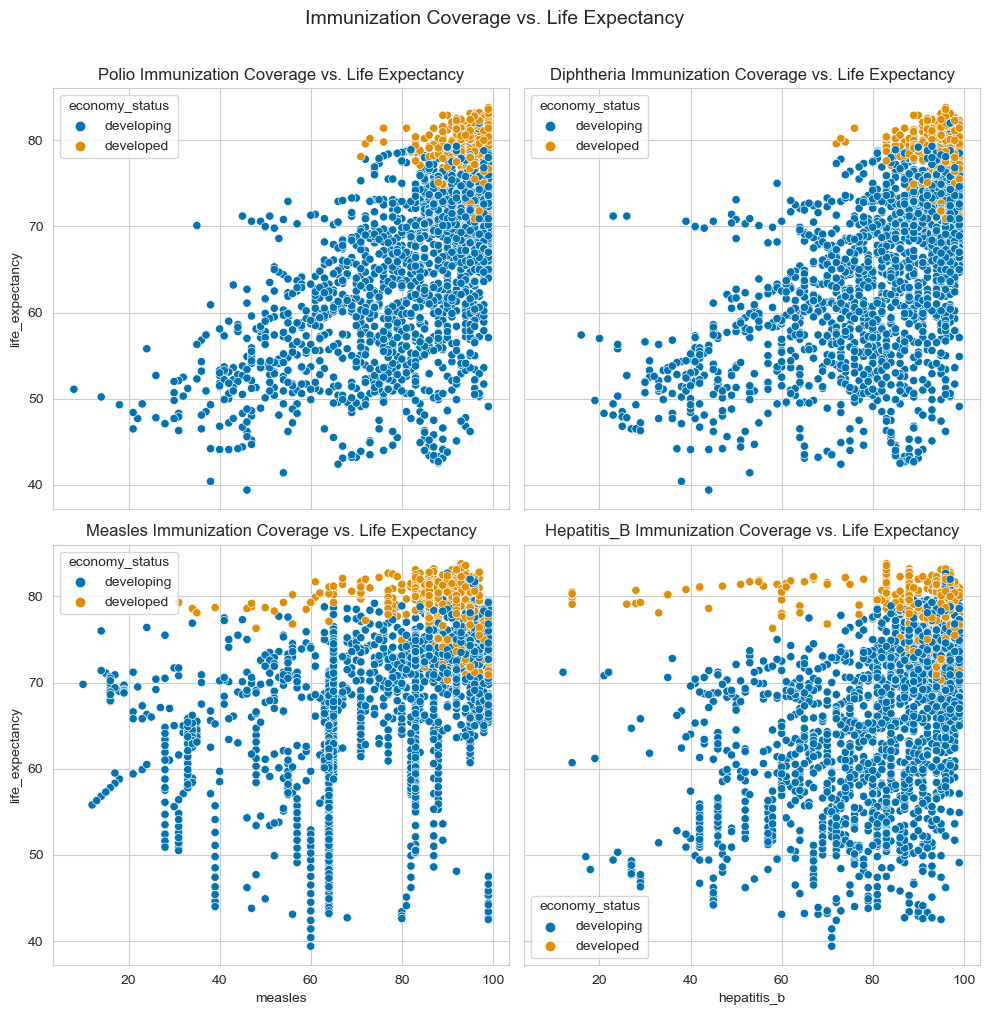

In [60]:
# plot immunization vs life expectancy
to_plot = ['polio', 'diphtheria', 'measles', 'hepatitis_b']

fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)
for i, col in enumerate(to_plot):
    sns.scatterplot(data=life, x=col, y='life_expectancy', hue='economy_status', ax=ax[i//2][i%2])
    ax[i//2][i%2].set_title(f'{col.title()} Immunization Coverage vs. Life Expectancy', fontsize=12)

plt.suptitle('Immunization Coverage vs. Life Expectancy', fontsize=14, y=1.01)
plt.tight_layout()
plt.show()

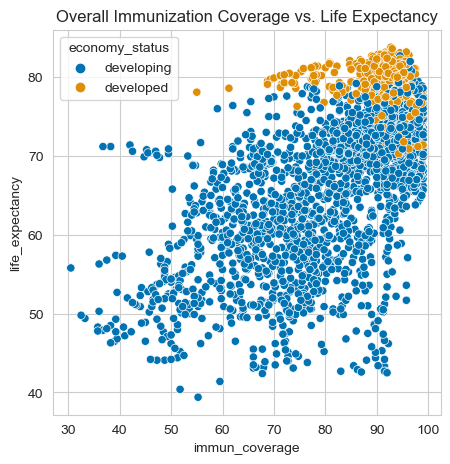

In [61]:
# plot immunization vs life expectancy
plt.figure(figsize=(5,5))
sns.scatterplot(data=life, x='immun_coverage', y='life_expectancy', hue='economy_status')
plt.title('Overall Immunization Coverage vs. Life Expectancy')
plt.show()

In [62]:
print('Overall corellation between immunization and life expectancy is {:.2f}'\
      .format(life['life_expectancy'].corr(life['immun_coverage'])))

Overall corellation between immunization and life expectancy is 0.64


We can see that immunization coverage is also associated to life expectancy, although the distribution is more distributed than previous factors (schooling and mortality).

### 5.4.5. Schooling vs. Life Expectancy <a id='545'></a>

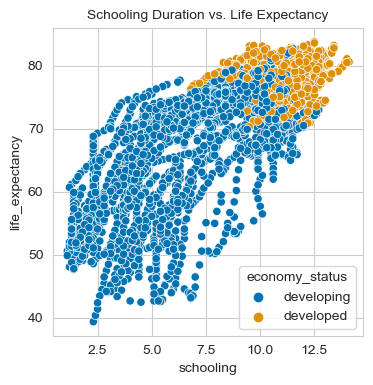

In [63]:
# plot schooling vs life expectancy
plt.figure(figsize=(4,4))
sns.scatterplot(data=life, x='schooling', y='life_expectancy', hue='economy_status')
plt.title('Schooling Duration vs. Life Expectancy', fontsize=10)
plt.show()

Based on this plot, we can see that developed countries have more schooling duration than developing countries.

### 5.4.6. Alcohol vs. Life Expectancy <a id='546'></a>

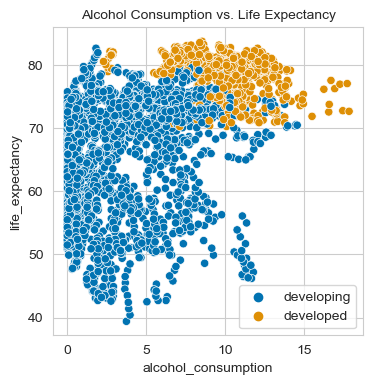

In [64]:
# plot alcohol_consumption vs life expectancy
plt.figure(figsize=(4,4))
sns.scatterplot(data=life, x='alcohol_consumption', y='life_expectancy', hue='economy_status')
plt.title('Alcohol Consumption vs. Life Expectancy', fontsize=10)
plt.legend(loc=4)
plt.show()

From this plot, it can be seen that developed countries have a higher alcohol consumption compared to developing countries.

### 5.4.7. HIV Incidents vs. Life Expectancy <a id='547'></a>

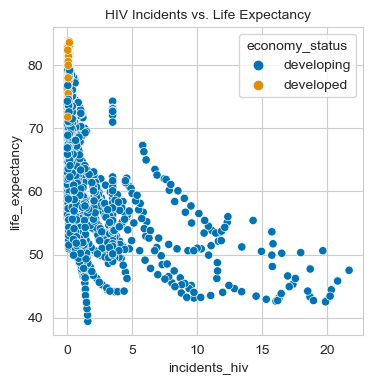

In [65]:
# plot incidents_hiv vs life expectancy
plt.figure(figsize=(4,4))
sns.scatterplot(data=life, x=life['incidents_hiv'], y='life_expectancy', hue='economy_status')
plt.title('HIV Incidents vs. Life Expectancy', fontsize=10)
plt.show()

It appears that the number of HIV cases exhibits a non-linear correlation with life expectancy, following a logarithmic function. This explains the moderate linear correlation coefficient. The number of HIV cases in developed countries is significantly lower compared to developing countries.

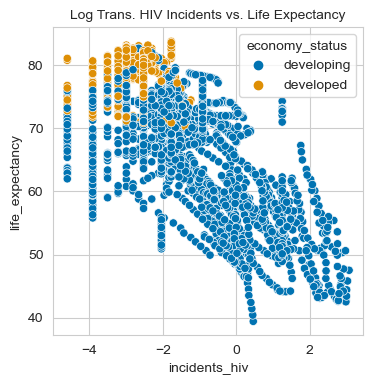

In [66]:
# plot incidents_hiv vs life expectancy
plt.figure(figsize=(4,4))
sns.scatterplot(data=life, x=np.log(life['incidents_hiv']), y='life_expectancy', hue='economy_status')
plt.title('Log Trans. HIV Incidents vs. Life Expectancy', fontsize=10)
plt.show()

In [67]:
print('Correlation between incidents_hiv and life expectancy before log transformation is {:.2f}'\
      .format(life['life_expectancy'].corr(life['incidents_hiv'])))
print('Correlation between incidents_hiv and life expectancy after log transformation is {:.2f}'\
      .format(life['life_expectancy'].corr(np.log(life['incidents_hiv']))))

Correlation between incidents_hiv and life expectancy before log transformation is -0.55
Correlation between incidents_hiv and life expectancy after log transformation is -0.69


After applying a logarithmic transformation to the number of HIV cases, it becomes apparent that the number of HIV cases actually has a strong correlation with life expectancy.

### 5.4.8. Population vs. Life Expectancy <a id='548'></a>

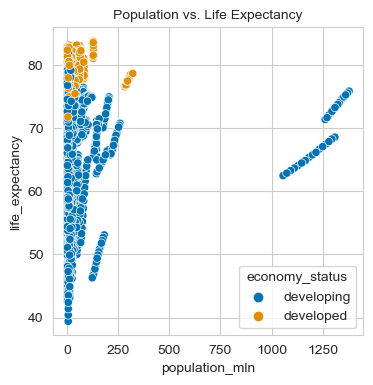

In [68]:
# plot population vs life expectancy
sns.set_style('whitegrid')
plt.figure(figsize=(4,4))
sns.scatterplot(data=life, x='population_mln', y='life_expectancy', hue='economy_status', sizes=(10,200))
plt.title('Population vs. Life Expectancy', fontsize=10)
plt.show()

Similar to the previous correlation matrix, there is no significant relationship between population size and life expectancy.

[back to table of contents](#back)

### 5.5. Confounding Variables <a id='55'></a>

In the previous analysis, it was found that the mortality rate has a very strong correlation with life expectancy. However, this correlation does not indicate a causal relationship. There are several other factors that actually cause high mortality rates and low life expectancy in individuals.

One of the causes is immunization coverage, as seen in the following graph:

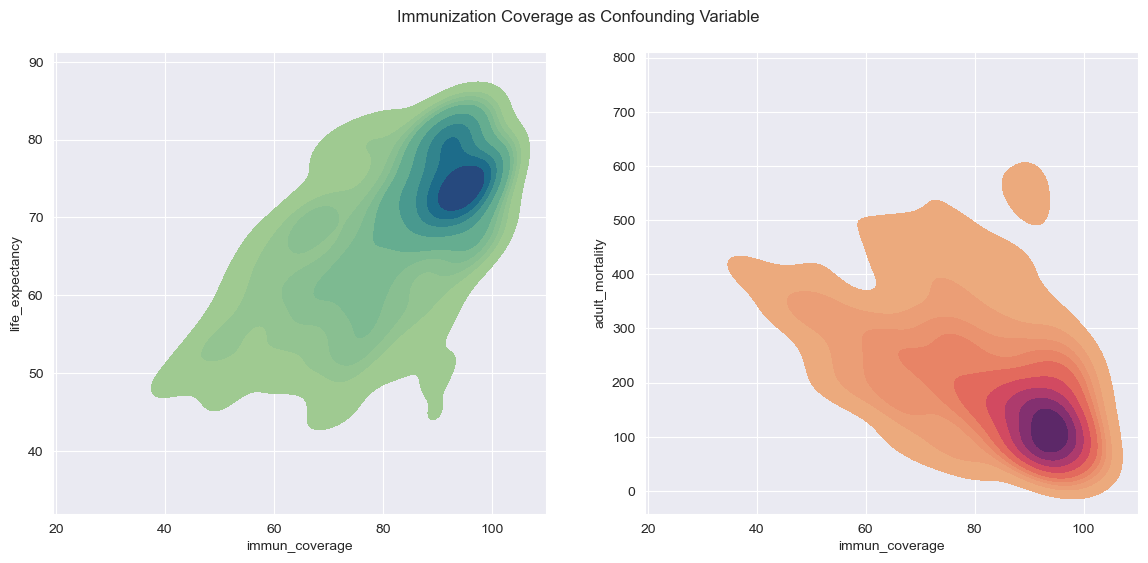

In [69]:
# make kdeplot to plot immun_coverage vs. life_expectancy and adult_mortality
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.kdeplot(data=life, x='immun_coverage', y='life_expectancy', fill=True, cmap='crest', ax=ax[0])
sns.kdeplot(data=life, x='immun_coverage', y='adult_mortality', fill=True, cmap='flare', ax=ax[1])
fig.suptitle('Immunization Coverage as Confounding Variable', y=0.95)
plt.show()

In this graph, it can be observed that as the proportion of the population immunized increases, the mortality rate decreases and life expectancy increases in a country.

Another cause is the number of HIV cases, as seen in the following graph:

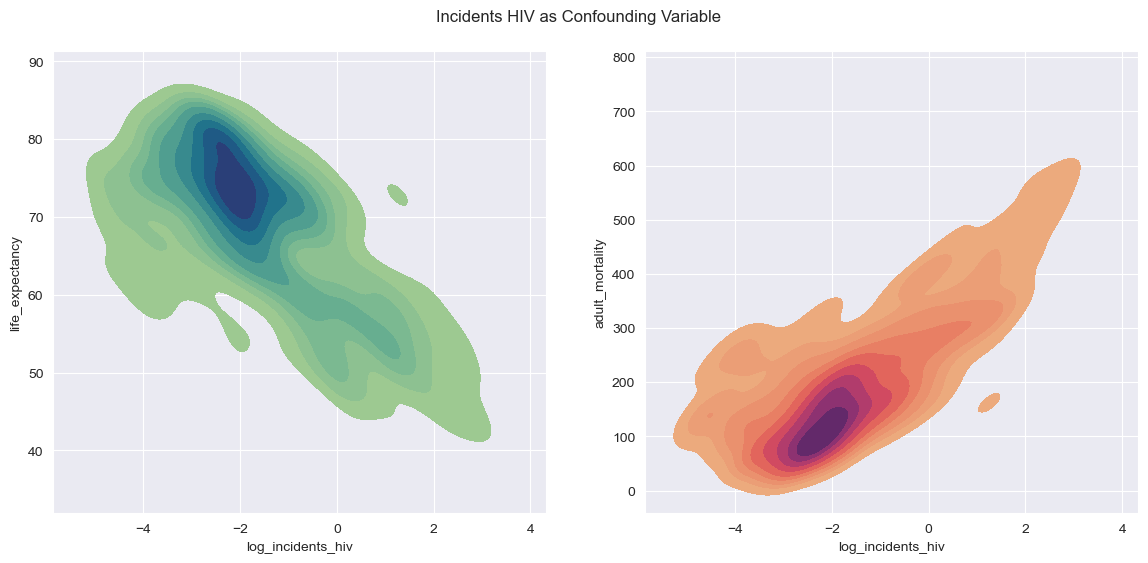

In [70]:
# make kdeplot to plot log_gdp vs. life_expectancy and adult_mortality
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.kdeplot(data=life, x='log_incidents_hiv', y='life_expectancy', fill=True, cmap='crest', ax=ax[0])
sns.kdeplot(data=life, x='log_incidents_hiv', y='adult_mortality', fill=True, cmap='flare', ax=ax[1])
fig.suptitle('Incidents HIV as Confounding Variable', y=0.95)
plt.show()

In this graph, it can be observed that as the number of HIV cases increases, the mortality rate decreases and life expectancy increases in a country.

Another cause is the duration of education, as seen in the following graph:

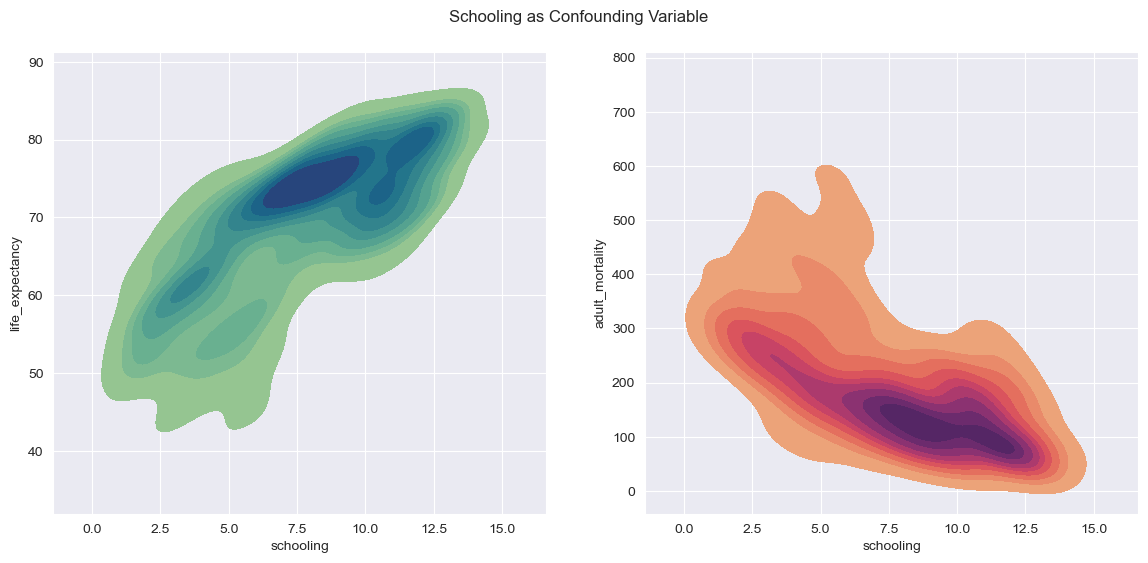

In [71]:
# make kdeplot to plot log_gdp vs. life_expectancy and adult_mortality
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.kdeplot(data=life, x='schooling', y='life_expectancy', fill=True, cmap='crest', ax=ax[0])
sns.kdeplot(data=life, x='schooling', y='adult_mortality', fill=True, cmap='flare', ax=ax[1])
fig.suptitle('Schooling as Confounding Variable', y=0.95)
plt.show()

In this graph, it can be observed that as the duration of education increases, the mortality rate decreases and life expectancy increases in a country.

Another cause is GDP per capita, as seen in the following graph:

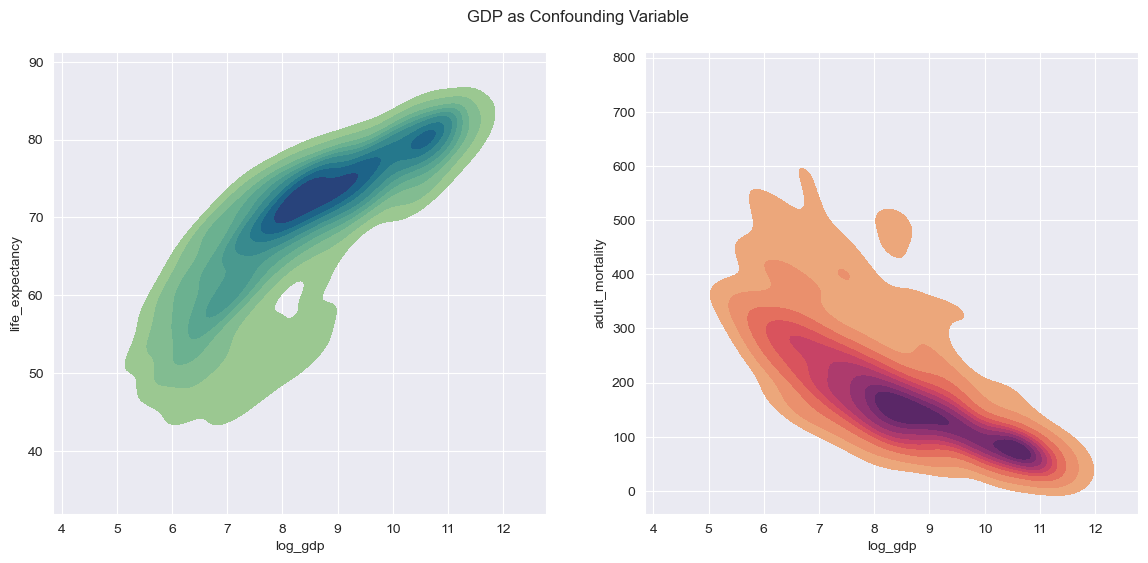

In [72]:
# make kdeplot to plot log_gdp vs. life_expectancy and adult_mortality
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.kdeplot(data=life, x='log_gdp', y='life_expectancy', fill=True, cmap='crest', ax=ax[0])
sns.kdeplot(data=life, x='log_gdp', y='adult_mortality', fill=True, cmap='flare', ax=ax[1])
fig.suptitle('GDP as Confounding Variable', y=0.95)
plt.show()

In this graph, it can be observed that as GDP increases, the mortality rate decreases and life expectancy increases in a country. Additionally, two clusters can be identified based on the data:
1. GDP ranging from $10^7$ to $10^{9.4}$ shows a life expectancy of around 70-76 years and an adult mortality rate of 130-180 per 1000 population.
2. GDP ranging from $10^{10.3}$ to $10^{10.8}$ exhibits a life expectancy of approximately 79-82 years and an adult mortality rate of 60-100 per 1000 population.

In addition, BMI also influences both factors. As seen in the following graph:

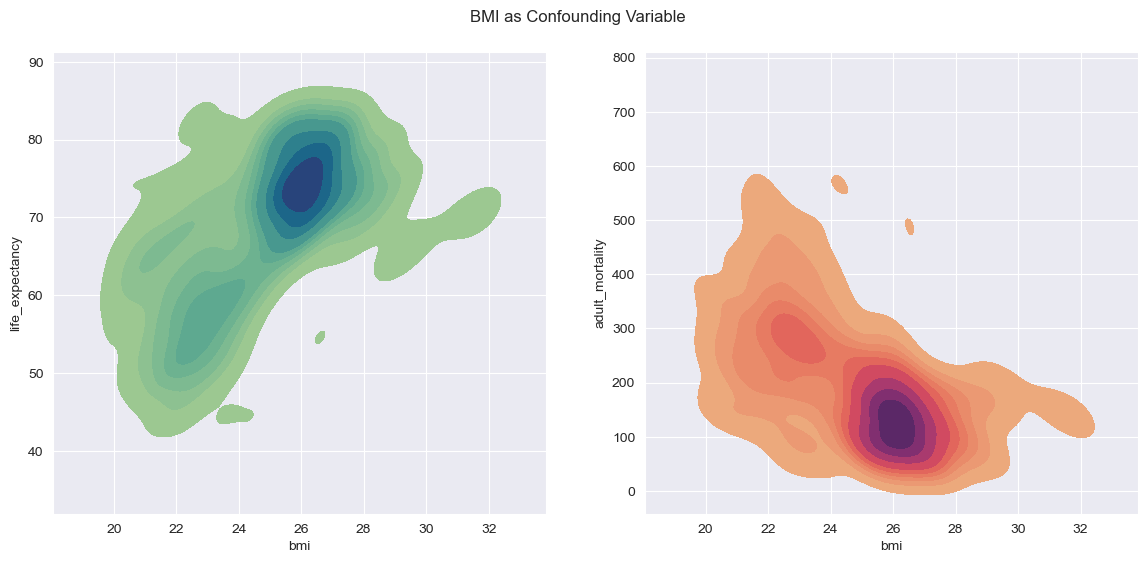

In [73]:
# make kdeplot to plot bmi vs. life_expectancy and adult_mortality
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14, 6))
sns.kdeplot(data=life, x='bmi', y='life_expectancy', fill=True, cmap='crest', ax=ax[0])
sns.kdeplot(data=life, x='bmi', y='adult_mortality', fill=True, cmap='flare', ax=ax[1])
fig.suptitle('BMI as Confounding Variable', y=0.95)
plt.show()

In this graph, it can be observed that higher BMI is associated with lower mortality rates and higher life expectancy in a country. Additionally, two clusters can be identified:
1. BMI around 25-27 $kg/m^2$ corresponds to a life expectancy of approximately 70-80 years and adult mortality rates of 80-170 deaths per 1000 individuals.
2. BMI around 22-24 $kg/m^2$ corresponds to a life expectancy of approximately 50-62 years and adult mortality rates of 250-320 deaths per 1000 individuals.

These confounding variables are not the root cause of the issue, but rather high-level causes that lead to certain life expectancy and mortality rates. Further research is needed to identify the underlying root causes of these variables.

[back to table of contents](#back)

## 6. Preprocessing <a id='preprocess'></a>

In [74]:
# list all available columns
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      2864 non-null   object 
 1   region                       2864 non-null   object 
 2   year                         2864 non-null   int64  
 3   infant_deaths                2864 non-null   float64
 4   under_five_deaths            2864 non-null   float64
 5   adult_mortality              2864 non-null   float64
 6   alcohol_consumption          2864 non-null   float64
 7   hepatitis_b                  2864 non-null   int64  
 8   measles                      2864 non-null   int64  
 9   bmi                          2864 non-null   float64
 10  polio                        2864 non-null   int64  
 11  diphtheria                   2864 non-null   int64  
 12  incidents_hiv                2864 non-null   float64
 13  gdp_per_capita    

In [75]:
# filter out unused columns
life_used = life.drop(['country', 'gdp_per_capita', 'incidents_hiv', 'economy_status_developed', 'economy_status', 'count'], axis=1)

In [76]:
# list all used columns
life_used.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   region                       2864 non-null   object 
 1   year                         2864 non-null   int64  
 2   infant_deaths                2864 non-null   float64
 3   under_five_deaths            2864 non-null   float64
 4   adult_mortality              2864 non-null   float64
 5   alcohol_consumption          2864 non-null   float64
 6   hepatitis_b                  2864 non-null   int64  
 7   measles                      2864 non-null   int64  
 8   bmi                          2864 non-null   float64
 9   polio                        2864 non-null   int64  
 10  diphtheria                   2864 non-null   int64  
 11  population_mln               2864 non-null   float64
 12  thinness_ten_nineteen_years  2864 non-null   float64
 13  thinness_five_nine

In [77]:
# perform OHE on categorical data
life_used = pd.get_dummies(life_used)

Based on the previous analysis, the mortality variables (`infant_deaths`, `under_five_deaths`, and `adult_mortality`) were not included as inputs in the model because mortality rates represent different approaches to the same concept as life expectancy.

In [78]:
# separate features and target columns
features = life_used.drop(['life_expectancy', 'infant_deaths', 'under_five_deaths', 'adult_mortality'], axis=1)
target = life_used['life_expectancy']

In [79]:
from sklearn.model_selection import train_test_split

# separate into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(features, target, test_size=0.2, random_state=0)

In [80]:
from sklearn.preprocessing import RobustScaler

# scale using power 
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [81]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((2291, 24), (573, 24), (2291,), (573,))

[back to table of contents](#back)

## 7. Modeling <a id='model'></a>

In [82]:
# import libraries for model development
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor 

In [83]:
# instantiate dictionary for scores
rmse_train = {}
rmse_valid = {}

In [84]:
# create dict to store models settings
model_dict = {'name' : ['LinearRegression',
                        'DecisionTreeRegressor',
                        'RandomForestRegressor',
                        'LGBMRegressor'],
              'model' : [LinearRegression(),
                         DecisionTreeRegressor(random_state=0),
                         RandomForestRegressor(random_state=0),
                         LGBMRegressor(random_state=0, verbose=-1)],
              'params' : [{'fit_intercept' : [True, False]},
                          {'max_depth' : np.arange(1,15),
                           'min_samples_leaf' : [1,2,5,8]},
                          {'max_depth' : np.arange(1,15),
                           'n_estimators' : np.arange(1,62,10),
                           'min_samples_leaf' : [1,2,5,8]},
                          {'max_depth' : np.arange(1,15),
                           'n_estimators' : np.arange(1,62,10),
                           'learning_rate' : np.logspace(-3,0,4)}]}

In [85]:
# instantiate KFold to ensure producibility
cv = KFold(n_splits=5, shuffle=True, random_state=0)

In [86]:
#define your own mse and set greater_is_better=False
def rmse(y_true, y_pred):
    return np.abs(mean_squared_error(y_true, y_pred))**0.5

rmse = make_scorer(rmse, greater_is_better=False)

In [87]:
for i in range(len(model_dict['name'])):
    
    # search for the best hyperparameters
    grid = GridSearchCV(model_dict['model'][i], param_grid=model_dict['params'][i], cv=cv, scoring=rmse)
    
    # fit grid with train datasets
    grid.fit(X_train, y_train)
    
    # print best hyperparameters and scores for each model
    print(model_dict['name'][i])
    print(grid.best_params_)
    print('Best score =', np.abs(grid.best_score_))
    print()
    
    # predict value and probability on training set with best estimator
    y_pred_train = grid.predict(X_train)
    
    # store scores
    rmse_train[model_dict['name'][i]] = np.abs(mean_squared_error(y_train, y_pred_train))**0.5
    
    # predict value and probability on validation set with best estimator
    y_pred_valid = grid.predict(X_valid)
    
    # store scores
    rmse_valid[model_dict['name'][i]] = np.abs(mean_squared_error(y_valid, y_pred_valid))**0.5

LinearRegression
{'fit_intercept': False}
Best score = 3.244944872007386

DecisionTreeRegressor
{'max_depth': 13, 'min_samples_leaf': 1}
Best score = 1.7604366866330607

RandomForestRegressor
{'max_depth': 14, 'min_samples_leaf': 1, 'n_estimators': 61}
Best score = 1.192354669110442

LGBMRegressor
{'learning_rate': 0.1, 'max_depth': 14, 'n_estimators': 61}
Best score = 1.2614849678556286



The best model currently is the Random Forest Regressor with hyperparameters `max_depth` equal to 14, `min_samples_leaf` equal to 1, and `n_estimators` equal to 61. This model achieved an `rmse` value of 1.19 in this grid search.

[back to table of contents](#back)

## 8. Model Evaluation <a id="eval"></a>

In [88]:
# store all scores to one dataframe
scores = pd.DataFrame([rmse_train, rmse_valid], index=['rmse_train', 'rmse_valid'])\
.T.sort_values(by='rmse_valid', ascending=True).reset_index().rename(columns={'index':'model'})
scores

model  rmse_train  rmse_valid
0  RandomForestRegressor    0.420071    0.936614
1          LGBMRegressor    0.727411    1.216993
2  DecisionTreeRegressor    0.343840    1.688351
3       LinearRegression    3.202805    3.141983

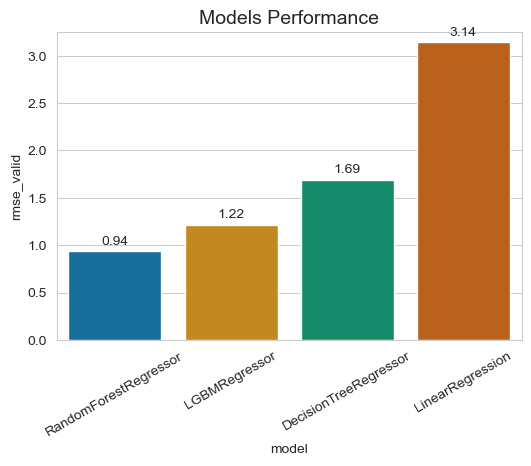

In [89]:
# make bar chart to compare rmse scores between models
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
bars = sns.barplot(data=scores.sort_values(by='rmse_valid', ascending=True), x='model', y='rmse_valid')

for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.2f}', (bar.get_x()+bar.get_width()/2, bar.get_height()), xytext=(-10,5), textcoords='offset points')

plt.title('Models Performance', fontsize=14)
plt.ylim([0,3.25])
plt.xticks(rotation=30)
plt.show()

The Random Forest Regressor is the best model followed by the LGBM Regressor. However, both of these models, along with the Decision Tree Regressor, are overfitting. This can be observed from the MSE values on the training and validation sets.

In [90]:
# predict using random forest regressor with best hyperparameters
m = RandomForestRegressor(min_samples_leaf=1, max_depth=14, n_estimators=61, random_state=0)
m.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, n_estimators=61, random_state=0)

In [91]:
# create feature importance dataframe
feature_imp = pd.DataFrame([m.feature_importances_], columns=features.columns).T
feature_imp = feature_imp.sort_values(by=0, ascending=False).reset_index().rename(columns={'index':'feature', 0:'importance'})

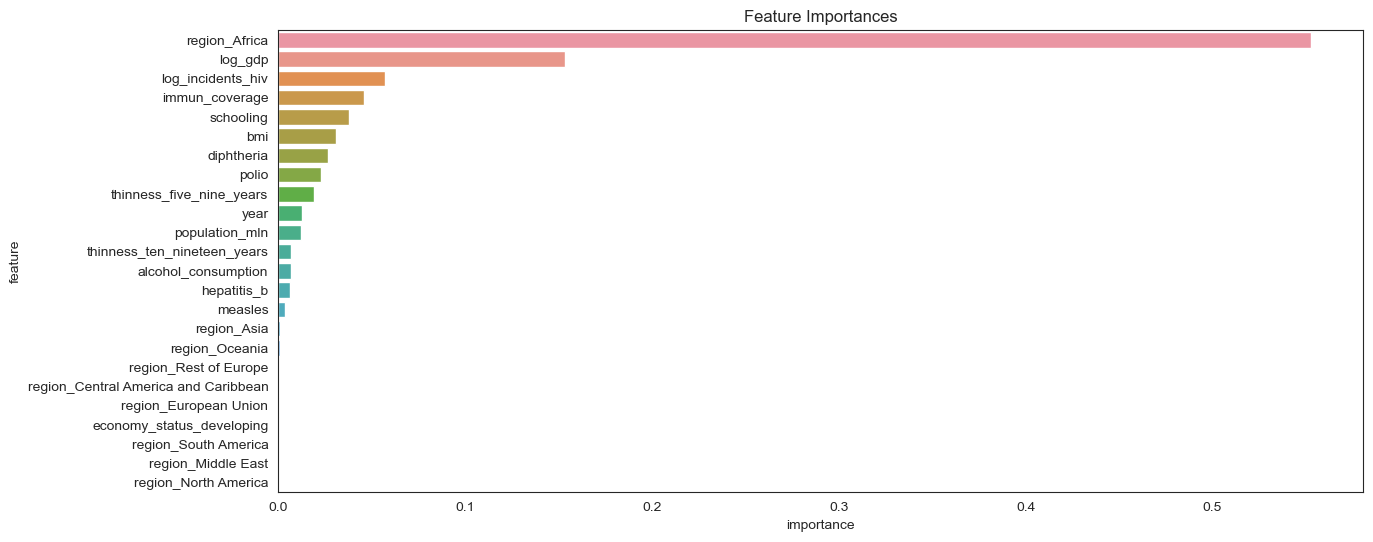

In [92]:
# plot feature importances
sns.set_style('white')
plt.figure(figsize=(14,6))
sns.barplot(data=feature_imp, x='importance', y='feature').set(title='Feature Importances')
plt.show()

From this plot, it can be seen that `region_Africa` is the most influential factor in predicting the life expectancy of a country, followed by `log_gdp` and `incidents_hiv`. This is consistent with the previous analysis where African countries have the lowest life expectancy and `log_gdp` has a strong correlation with life expectancy.

## 9. Model Tuning <a id="tune"></a>

In [93]:
# get rmse for each max_depth
rmses_train_depth = []
rmses_valid_depth = []

for i in range(1,21):
    m = RandomForestRegressor(min_samples_leaf=1, max_depth=i, n_estimators=61, random_state=0)
    m.fit(X_train, y_train)
    y_pred_train = m.predict(X_train)
    y_pred_valid = m.predict(X_valid)
    rmses_train_depth.append(np.abs(mean_squared_error(y_train, y_pred_train))**0.5)
    rmses_valid_depth.append(np.abs(mean_squared_error(y_valid, y_pred_valid))**0.5)

In [94]:
# get rmse for each n_estimators
rmses_train_est = []
rmses_valid_est = []

for i in range(1,82,5):
    m = RandomForestRegressor(min_samples_leaf=1, max_depth=12, n_estimators=i, random_state=0)
    m.fit(X_train, y_train)
    y_pred_train = m.predict(X_train)
    y_pred_valid = m.predict(X_valid)
    rmses_train_est.append(np.abs(mean_squared_error(y_train, y_pred_train))**0.5)
    rmses_valid_est.append(np.abs(mean_squared_error(y_valid, y_pred_valid))**0.5)

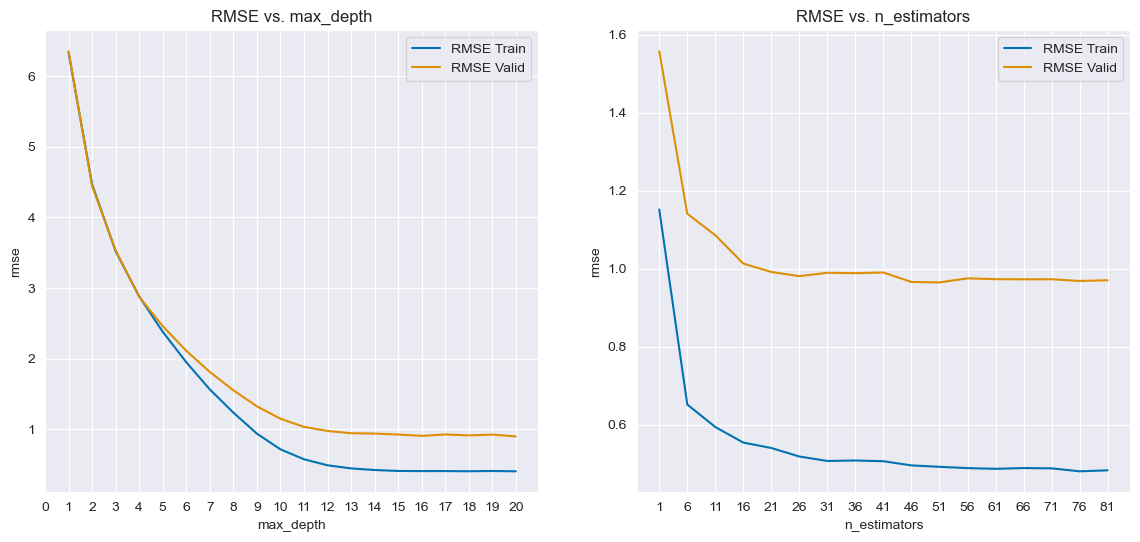

In [95]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1,2,figsize=(14,6))

# plot rmse vs. max_depth
ax[0].plot(np.arange(1,21), rmses_train_depth, label='RMSE Train')
ax[0].plot(np.arange(1,21), rmses_valid_depth, label='RMSE Valid')
ax[0].set(title='RMSE vs. max_depth', xlabel='max_depth', ylabel='rmse', xticks=np.arange(0,21,1))
ax[0].legend()

# plot rmse vs. n_estimators
ax[1].plot(np.arange(1,82,5), rmses_train_est, label='RMSE Train')
ax[1].plot(np.arange(1,82,5), rmses_valid_est, label='RMSE Valid')
ax[1].set(title='RMSE vs. n_estimators', xlabel='n_estimators', ylabel='rmse', xticks=np.arange(1,82,5))
ax[1].legend()

plt.show()

The Random Forest Regressor model provides the best RMSE value for the validation set at max_depth = 12 and n_estimators = 46. After that, the RMSE score does not show significant improvement.

In [96]:
# train best model
best_model = RandomForestRegressor(min_samples_leaf=1, max_depth=16, n_estimators=46, random_state=0)
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=16, n_estimators=46, random_state=0)

In [97]:
y_pred_valid = best_model.predict(X_valid)
print('Best RMSE = {:.2f}'.format(np.abs(rmse(best_model, X_valid, y_valid))))

Best RMSE = 0.90


Generally, this model will provide results with a difference of 0.90 years from the actual life expectancy value.

In [98]:
# save the model
#pickle.dump(best_model, open('best.sav', 'wb'))
  
# load the model
#load_model = pickle.load(open(filename, 'rb'))

[back to table of contents](#back)

## 10. General Conclusion <a id='end'></a>

### 10.1 Conclusion and Summary <a id='101'></a>

**The conclusion of this study is as follows:**

In this study, the data used consisted of **9 regions** and **179 countries**. **The number of developing countries** was **142**, while there were **37 developed countries**. The number of countries involved was **highest** in the **Africa** region (816), followed by **Asia** (432) and the **European Union** (432). The **Asia** region had the **highest population** from 2000 to 2015, and it continued to **increase** steadily. Among the many countries in Asia, **China** had the highest population, followed by **India** and then **Indonesia**. **Globally**, China had the highest population, followed by India and America.

Based on regions, the **highest life expectancy** was found in the **European Union**, followed by **North America**. Meanwhile, the **lowest life expectancy** was found in **Africa**, followed by **Oceania and Asia**. The median age **difference** between the European Union and Africa was **18.8** years. Looking at individual countries, **Japan** from Asia had the highest life expectancy (83.8 years), while **Sierra Leone** from Africa had the lowest life expectancy (39.4 years). The **difference** between these two countries was **44.4** years.

Both developed and developing countries experienced a **stable increase** in life expectancy each year, with a **gradually decreasing** difference between them. Based on hypothesis testing, it was found that the life expectancy of the two groups was **significantly different**, with developing countries having a **lower life expectancy** than developed countries. The **range of life expectancy** in developing countries was wider compared to developed countries. Developing countries had a range of life expectancy from around 40 to 84 years, with a median around **74** years. Meanwhile, developed countries had a range of life expectancy from around 70 to 84 years, with a median around **80** years.

In the initial analysis, it was found that three factors, namely `adult_mortality`, `under_five_deaths`, and `infant_deaths`, were highly correlated with life expectancy. These three factors had almost perfect correlation (> 0.9). However, further analysis revealed that these factors were not the causes of life expectancy in a country. Further analysis proved that there were **confounding variables** related to mortality and life factors, such as `immune_cover`, `incidents_hiv`, `schooling`, `gdp_per_capita`, and also `bmi`. These factors were the ones that caused the differences in life expectancy and mortality rates between developed and developing countries. However, it should be noted that `bmi` and `gdp_per_capita` are not the root causes of this problem, but rather there are other factors that cause these differences, such as lack of economic activity or well-being, etc. This is beyond the scope of this study due to the lack of data on those variables.

The best model created was the **Random Forest Regressor** model with hyperparameters **max_depth of 16**, **min_samples_leaf of 1**, and **n_estimators of 46**, which yielded an **RMSE** value of **0.9** on the validation data. This means that, in general, the predictions of this model will have a difference of approximately **0.9 years** from the actual values. This model accepts preprocessed input data with a **logarithmic transformation** applied to `gdp_per_capita`. Additionally, all **categorical** variables are transformed into numerical values using the **one-hot-encoding** method, while **numerical values** are transformed using **RobustScaler** to ensure they are on the same scale and are not influenced by outliers. Based on the evaluation of the model, it was also determined that `region_Africa`, `log_gdp`, and `hiv_incidents` have the most significant impact on predicting life expectancy.

### 10.2 Recommendation <a id='102'></a>

**The recommendations for further research are as follows:**
1. Conduct a more in-depth study to investigate the root causes of low life expectancy by incorporating additional data on access to healthcare services, economic capacity or well-being, access to nutritious food and clean drinking water, health-related habits, and other relevant factors.
2. Further experiment with hyperparameters in the model to achieve lower and more accurate metric values. Additionally, consider incorporating the additional variables suggested in the first recommendation.

[back to table of contents](#back)